In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
abd_df = pd.read_csv('result_abd.csv')
normal_cass_df = pd.read_csv('result_normal_cass.csv')

In [7]:
abd_df.head()

,write_read_fraction,num_key,data_size,write_average,read_average,ninety_five_write,ninety_five_read,total_time
0,0.1,1.0,8.0,1.0365,0.7716,1.0,0.0,140554.0
1,0.1,1.0,16.0,1.0335,0.7580,1.0,0.0,140355.0
2,0.1,1.0,32.0,1.0324,0.7388,1.0,0.0,139539.0
3,0.1,1.0,64.0,1.0357,0.7670,1.0,0.0,141108.0
4,0.1,1.0,128.0,1.0331,0.7876,1.0,0.0,141147.0


In [48]:
write_read_fractions = abd_df['write_read_fraction'].unique()
num_keys = abd_df['num_key'].unique()
data_sizes = abd_df['data_size'].unique()

In [31]:
def graph_variations(df,outer_col,inner_col,x_col,y_col):
    outer_filters = df[outer_col].unique()
    inner_filters = df[inner_col].unique()
    for outer_filter in outer_filters:
        outer_df = df[df[outer_col]==outer_filter]
        for inner_filter in inner_filters:
            inner_df = outer_df[outer_df[inner_col]==inner_filter]
            plt.plot(inner_df[x_col],inner_df[y_col],label=str(inner_filter))
        plt.legend(loc='upper left',title=inner_col)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title("{} vs {}, {} : {} ".format(x_col,y_col,outer_col,str(outer_filter)))
        plt.show()

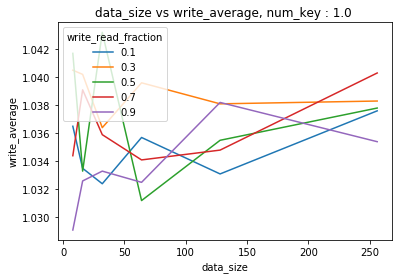

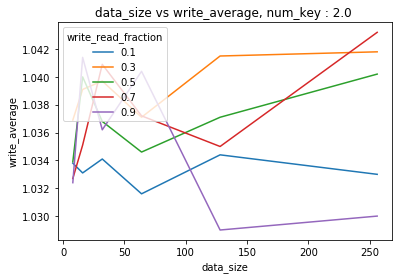

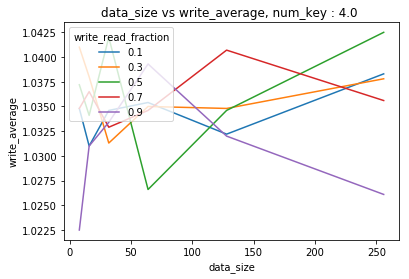

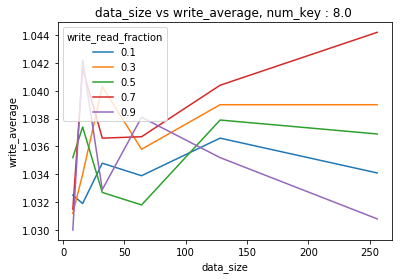

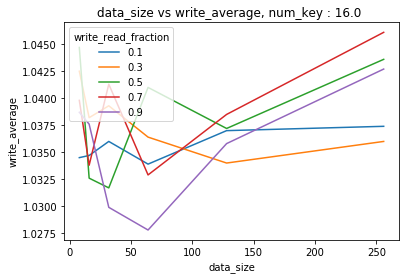

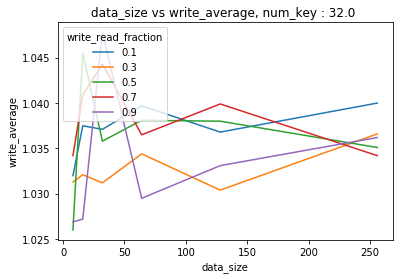

In [36]:
graph_variations(abd_df,"num_key","write_read_fraction","data_size","write_average")

In [30]:
#graph_variations(normal_cass_df,"num_key","write_read_fraction","data_size","read_average")

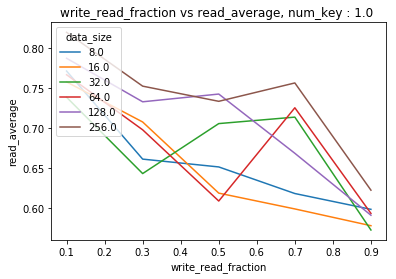

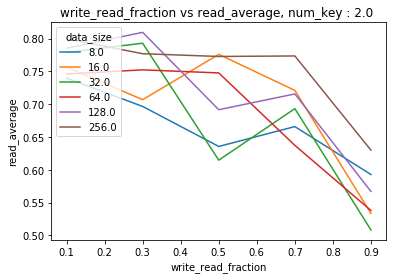

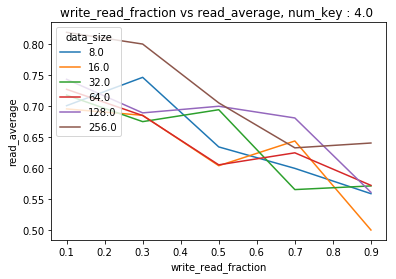

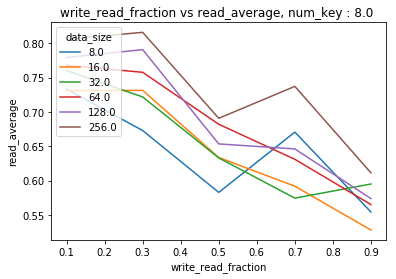

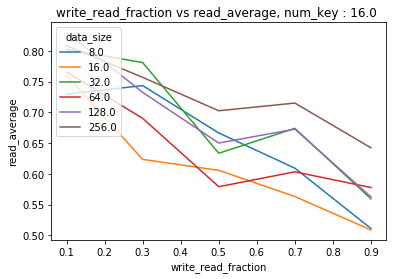

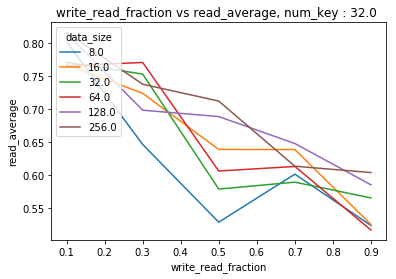

In [33]:
graph_variations(abd_df,"num_key","data_size","write_read_fraction" ,"read_average")

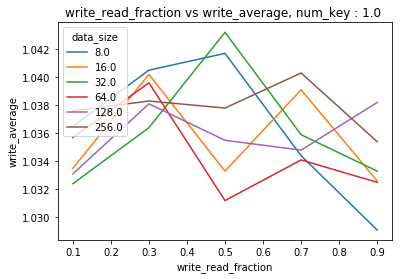

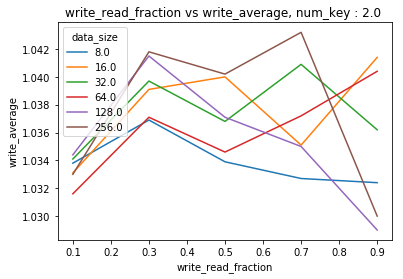

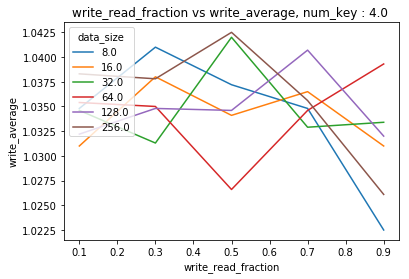

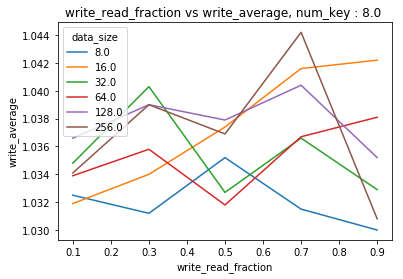

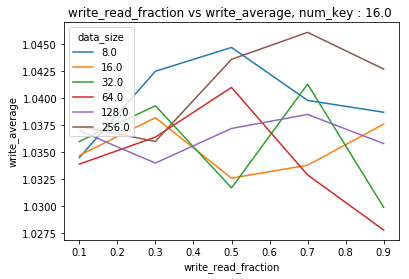

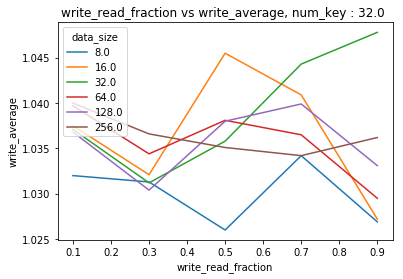

In [37]:
graph_variations(abd_df,"num_key","data_size","write_read_fraction" ,"write_average")

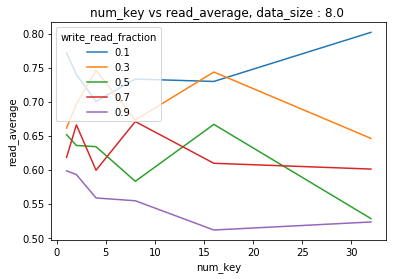

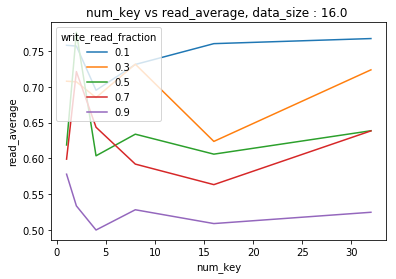

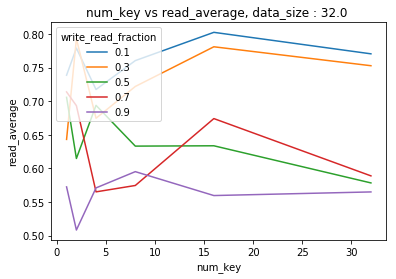

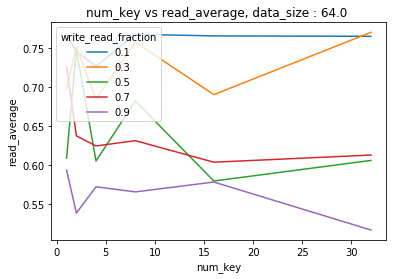

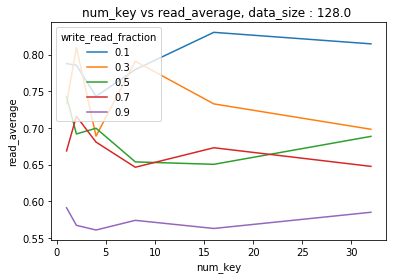

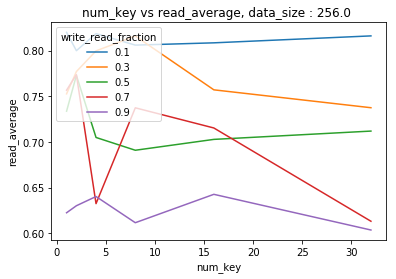

In [39]:
graph_variations(abd_df,"data_size","write_read_fraction","num_key","read_average")

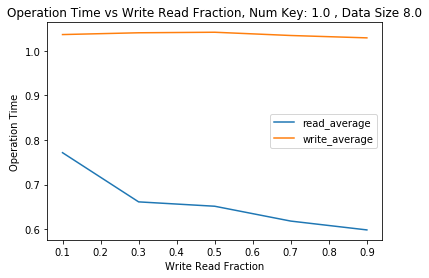

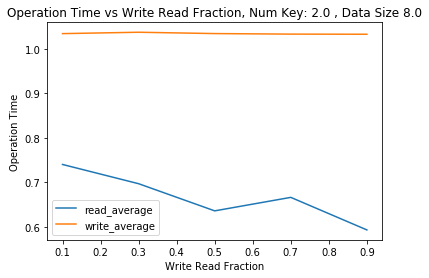

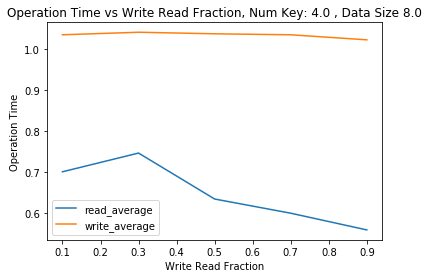

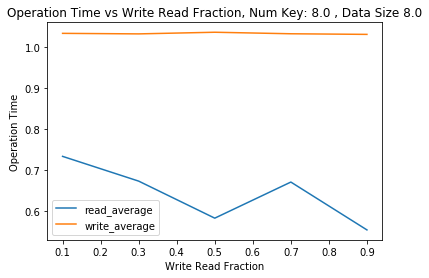

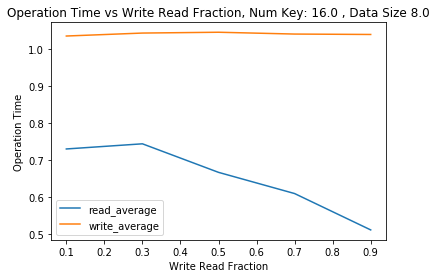

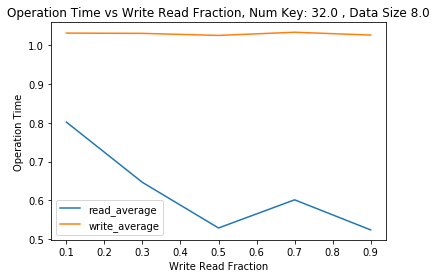

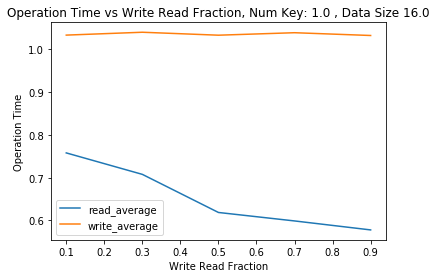

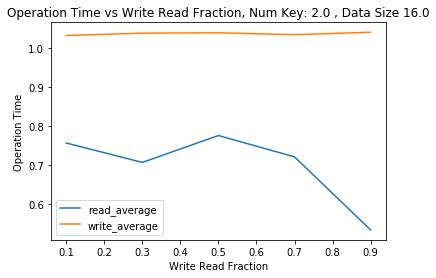

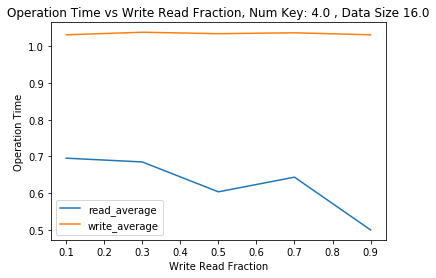

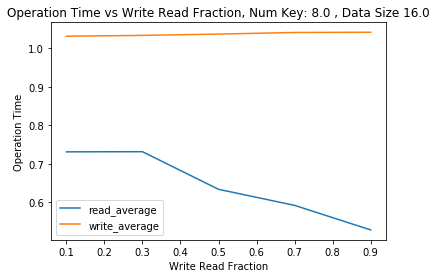

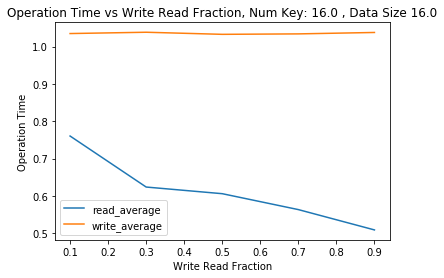

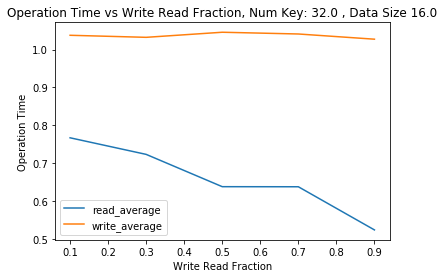

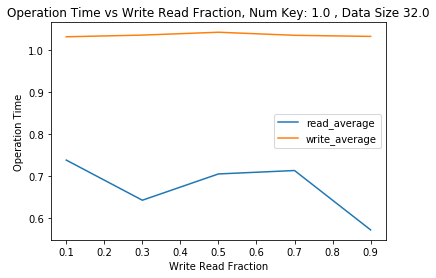

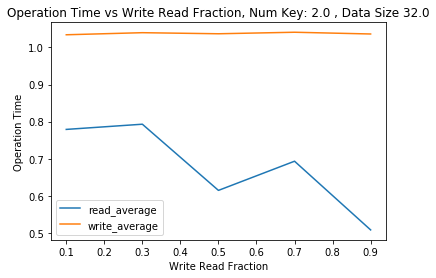

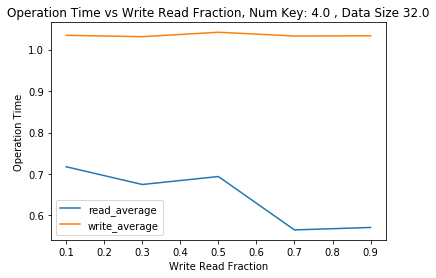

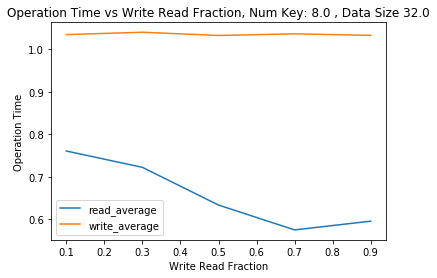

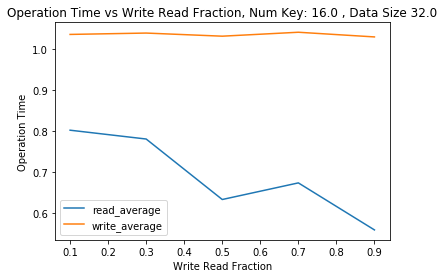

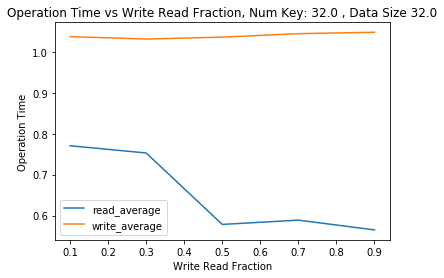

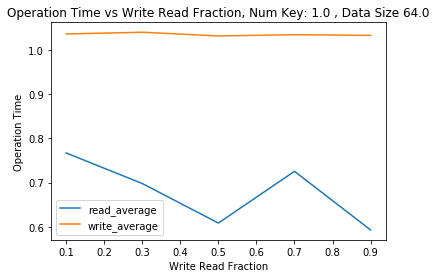

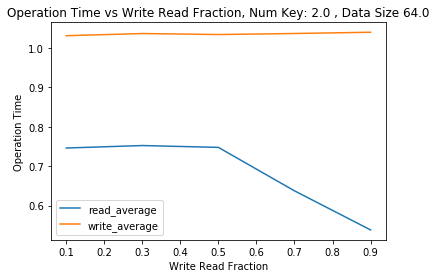

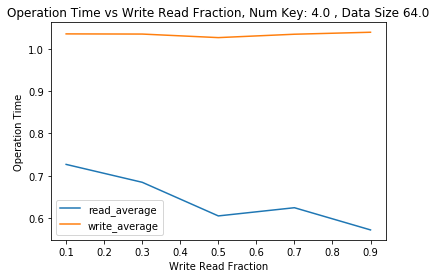

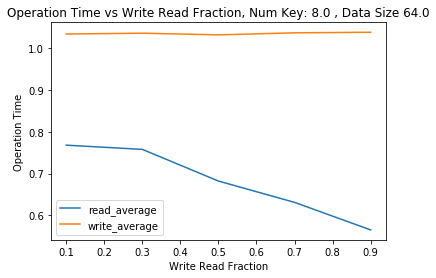

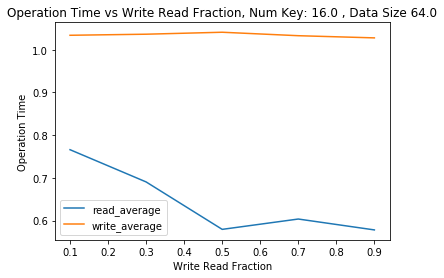

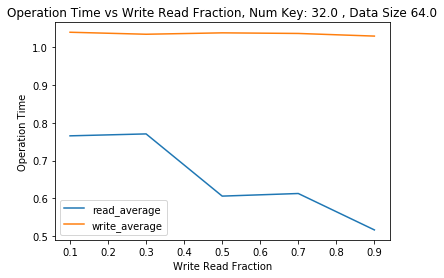

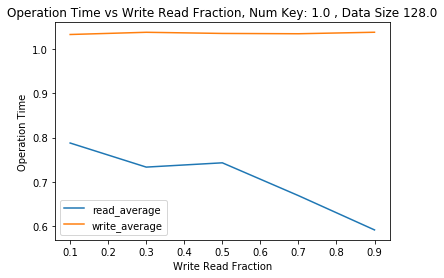

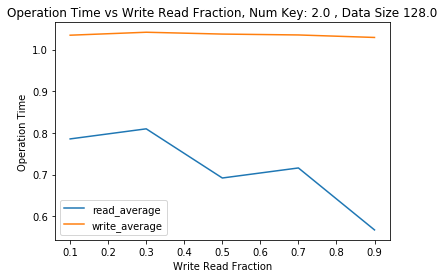

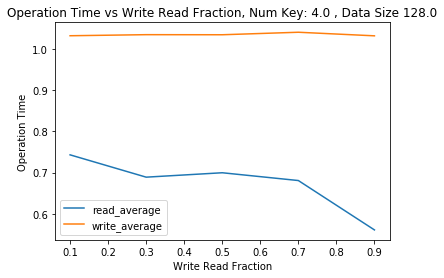

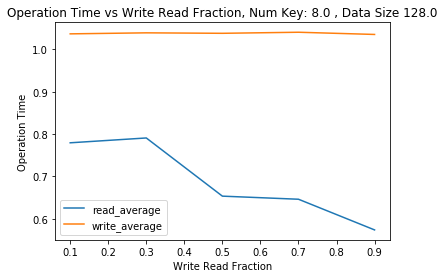

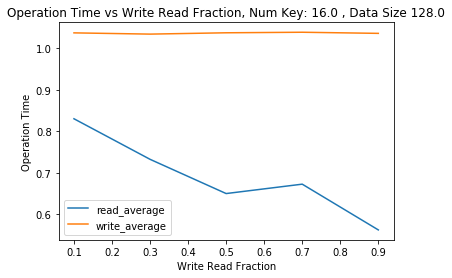

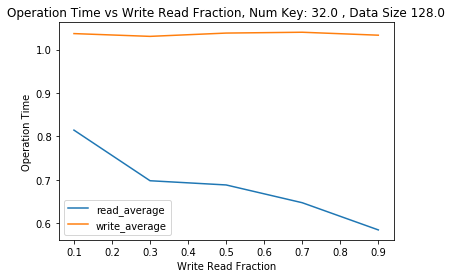

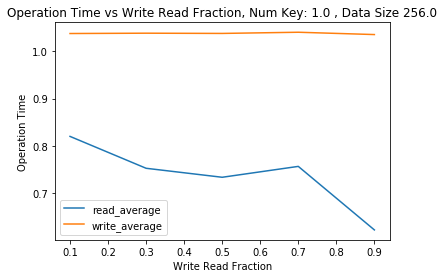

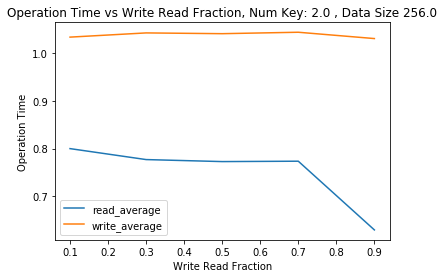

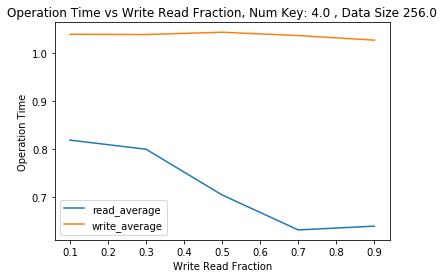

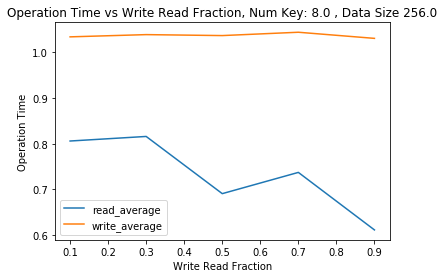

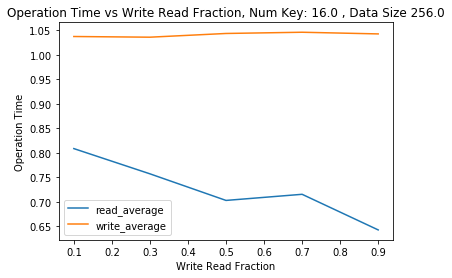

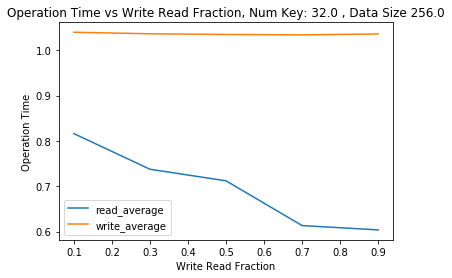

In [51]:
for data_size in data_sizes:
    for num_key in num_keys:
        tmp_df = abd_df[(abd_df['data_size'] ==data_size) & (abd_df['num_key']==num_key)]
        plt.plot(tmp_df['write_read_fraction'],tmp_df['read_average'], label ='read_average')
        plt.plot(tmp_df['write_read_fraction'],tmp_df['write_average'], label ="write_average")
        plt.xlabel("Write Read Fraction")
        plt.ylabel("Operation Time")
        plt.title("Operation Time vs Write Read Fraction, Num Key: {} , Data Size {}".format(num_key,data_size))
        plt.legend()
        plt.show()

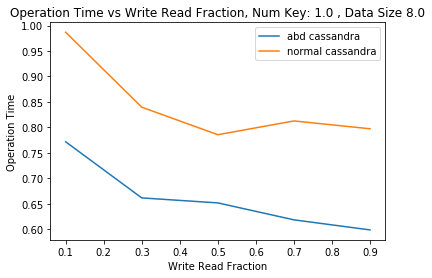

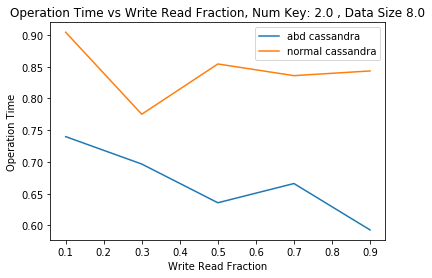

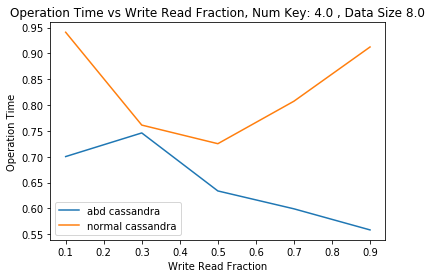

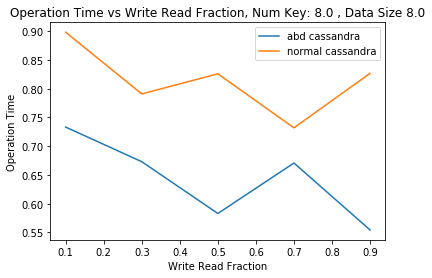

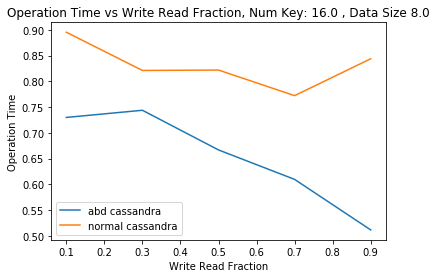

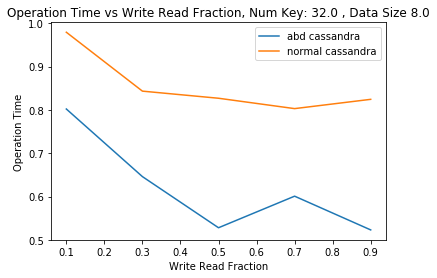

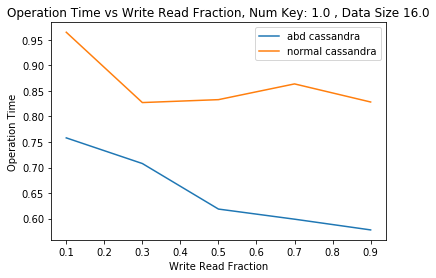

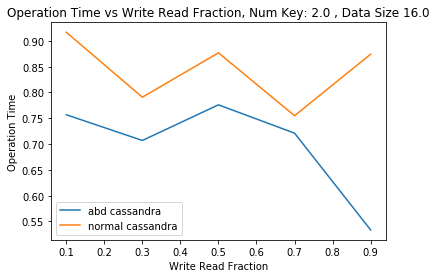

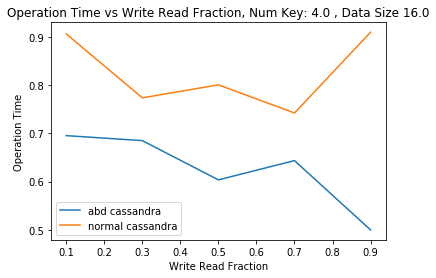

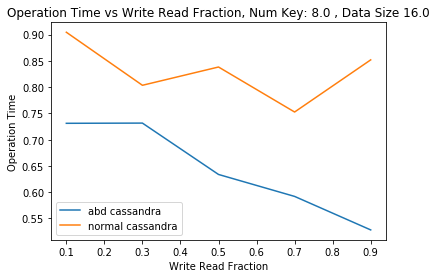

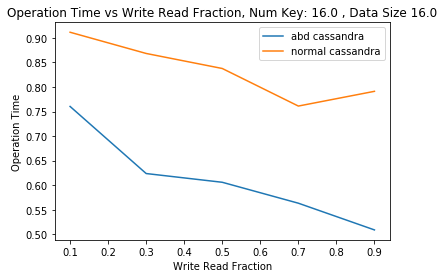

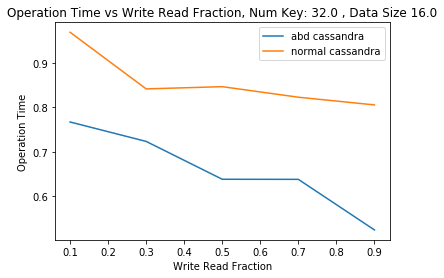

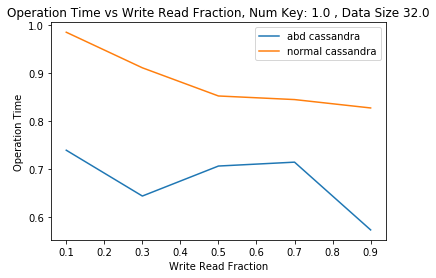

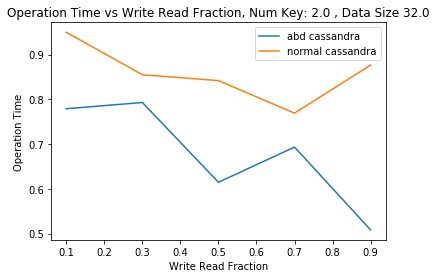

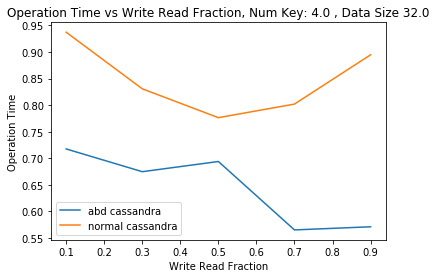

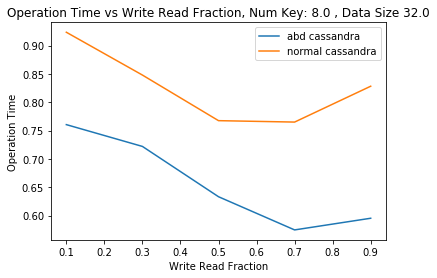

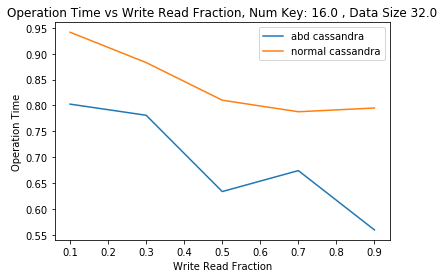

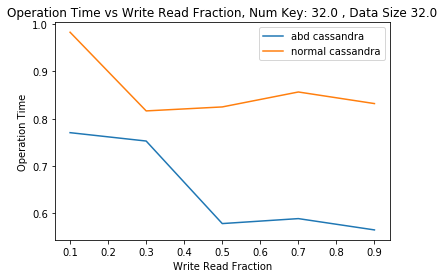

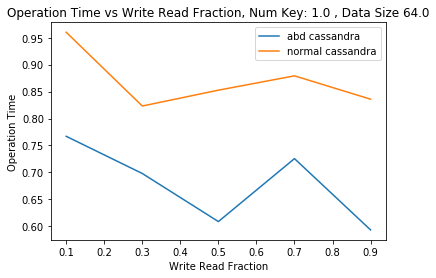

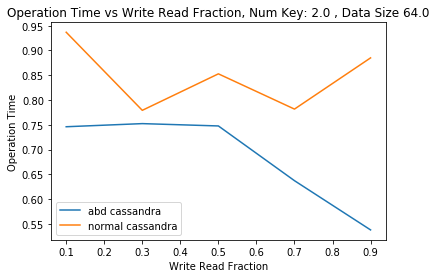

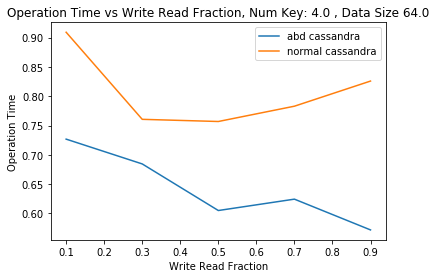

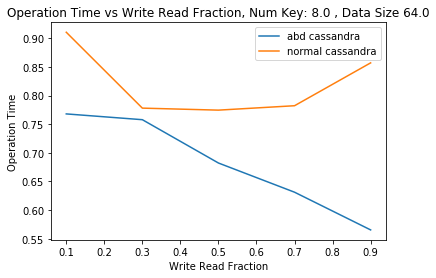

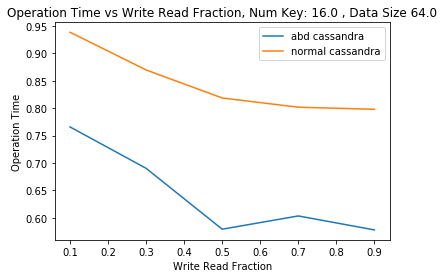

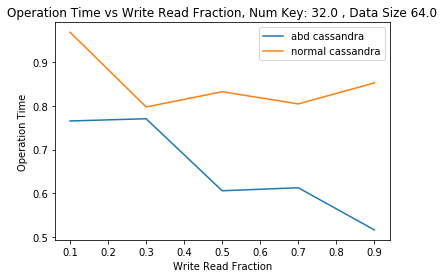

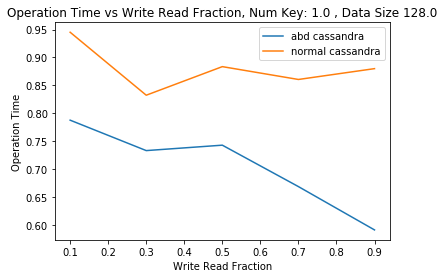

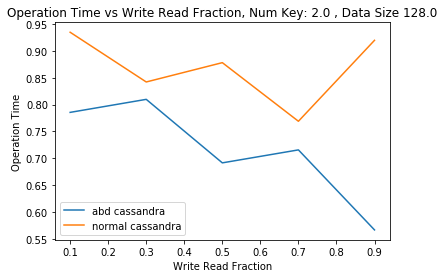

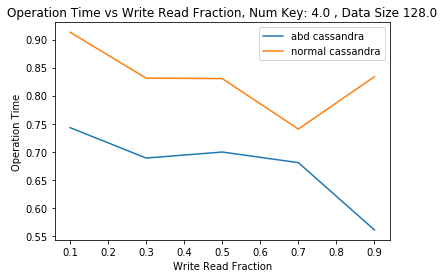

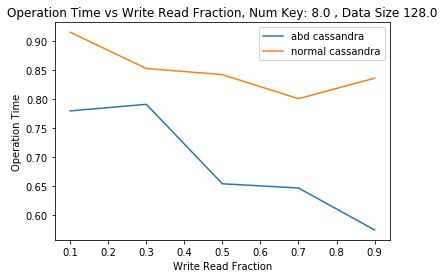

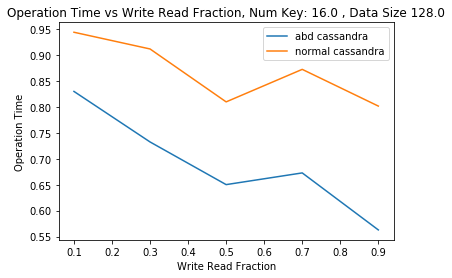

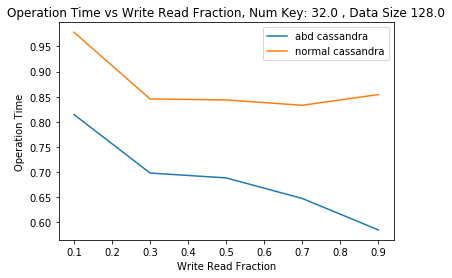

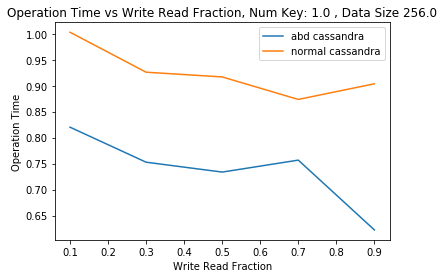

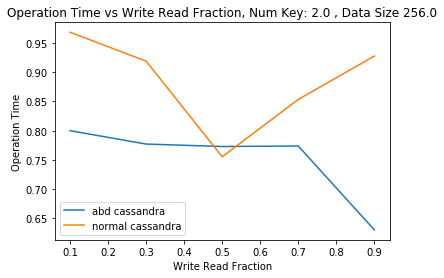

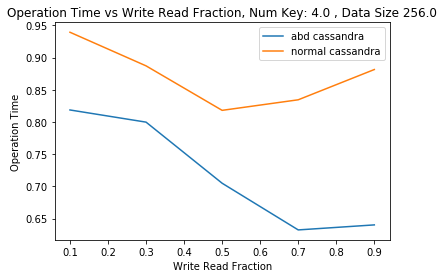

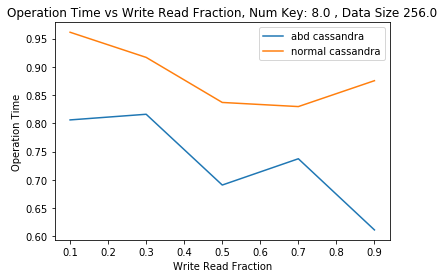

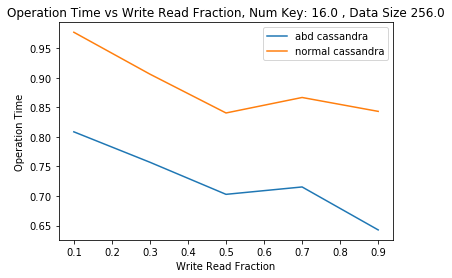

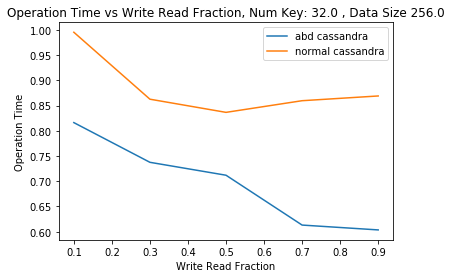

In [52]:
for data_size in data_sizes:
    for num_key in num_keys:
        abd_tmp_df = abd_df[(abd_df['data_size'] ==data_size) & (abd_df['num_key']==num_key)]
        normal_cass_tmp_df = normal_cass_df[(normal_cass_df['data_size'] ==data_size) & (normal_cass_df['num_key']==num_key)]
        plt.plot(tmp_df['write_read_fraction'],abd_tmp_df['read_average'], label ='abd cassandra')
        plt.plot(tmp_df['write_read_fraction'],normal_cass_tmp_df['read_average'], label ="normal cassandra")
        plt.xlabel("Write Read Fraction")
        plt.ylabel("Operation Time")
        plt.title("Operation Time vs Write Read Fraction, Num Key: {} , Data Size {}".format(num_key,data_size))
        plt.legend()
        plt.show()